# Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Importing the dataset

In [2]:
iris = datasets.load_iris()
print(iris)
# We'll use the petal length and width only for this analysis
X = iris.data[:, [2, 3]]
y = iris.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

##Exploratory Data Analysis
##Place the iris data into a pandas dataframe

In [3]:
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the first 5 rows of the data
print(iris_df.head())

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The unique labels in this data are [0 1 2]


In [4]:
iris_df.shape

(150, 2)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [6]:
iris_df.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=69)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.255758         -0.258263
1           0.797363          0.980613
2           0.680350          0.430001
3          -0.138745         -0.258263
4           0.329309          0.154696


#Plot the original Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


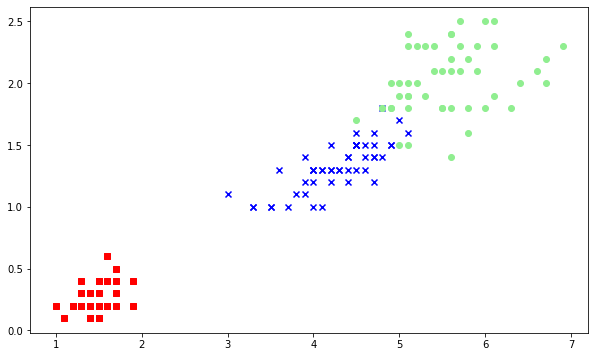

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

###If we plot the original data, we can see that one of the classes is linearly separable, but the other two are not.

## Training the SVM model on the Training set

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=0.1, random_state=0)

## Finding Accuracy of model on Test and Train Set

In [11]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm.predict(X_test_std))
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(X_test_std)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



find support vectors for the model

In [14]:
print("indices of support vector for my model")
print(svm.support_)

indices of support vector for my model
[  6  22  80  82  83  89   0   2   3   7  11  14  17  20  23  32  36  49
  58  60  61  64  68  69  73  75  79  93 104   1   9  15  28  44  50  53
  54  56  62  71  72  76  84  85  86  94]


In [15]:
print("support vector for my model\n",svm.support_vectors_)

support vector for my model
 [[-1.25037233 -1.08418023]
 [-1.19186561 -1.08418023]
 [-1.25037233 -0.80887449]
 [-1.19186561 -0.94652736]
 [-1.07485215 -1.08418023]
 [-1.07485215 -1.35948597]
 [-0.25575798 -0.258263  ]
 [ 0.68034965  0.43000135]
 [-0.13874452 -0.258263  ]
 [ 0.73885638  0.70530709]
 [ 0.5633362   0.56765422]
 [ 0.44632274  0.43000135]
 [-0.13874452 -0.258263  ]
 [-0.43127816 -0.12061013]
 [ 0.38781602  0.29234848]
 [ 0.44632274  0.15469561]
 [ 0.44632274  0.43000135]
 [ 0.15378911 -0.258263  ]
 [ 0.44632274  0.43000135]
 [ 0.5633362   0.29234848]
 [ 0.79736311  0.56765422]
 [-0.25575798 -0.258263  ]
 [ 0.27080256  0.43000135]
 [ 0.50482947  0.29234848]
 [ 0.62184293  0.29234848]
 [ 0.62184293  0.84295996]
 [ 0.5633362   0.43000135]
 [ 0.38781602  0.29234848]
 [ 0.50482947  0.43000135]
 [ 0.79736311  0.98061283]
 [ 0.79736311  0.43000135]
 [ 0.79736311  1.1182657 ]
 [ 0.62184293  0.84295996]
 [ 1.03139001  0.84295996]
 [ 1.03139001  0.84295996]
 [ 1.08989674  0.84295996]

In [16]:
print("number of support vectors in my model: ",svm.n_support_)

number of support vectors in my model:  [ 6 23 17]


## Create the function for Visualizing Testing and Training model

In [17]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
plt.show()

## Visualising the Train set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


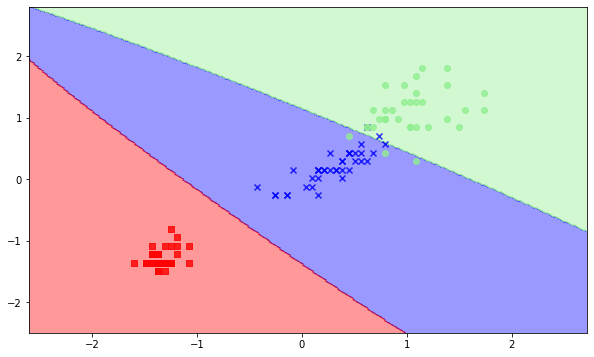

In [18]:
plot_decision_regions(X_train_std, y_train, svm)

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


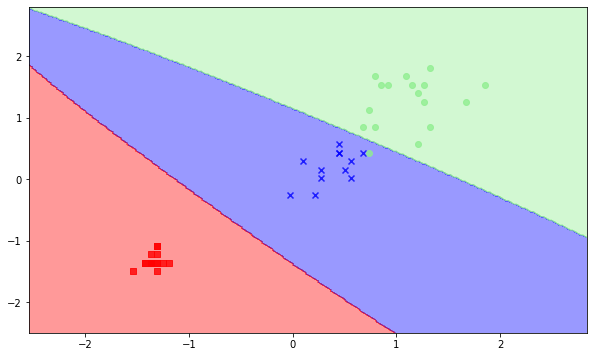

In [19]:
plot_decision_regions(X_test_std, y_test, svm)

**Q] {Petal Width = 1.2 Petal Length = 2.0}**

In [28]:
y_pred=svm.predict([[2.0,1.2]])
y_pred

array([2])

**Q]Crete the model with following settings
kernel='poly',
degree = Other than 3 any integer number preferably 5
random_state= any number of your choice,
coef0 = any float number of your choice other than 0.0
gamma=.10,
C=1.0**

In [30]:
svm2 = SVC(kernel='poly', random_state=57,degree=5,coef0=5.7, gamma=.10, C=1.0)
svm2.fit(X_train_std, y_train)

SVC(coef0=5.7, degree=5, gamma=0.1, kernel='poly', random_state=57)

In [31]:
print("number of support vectors in my model: ",svm2.n_support_)

number of support vectors in my model:  [1 6 5]


In [39]:
y_predicted=svm2.predict([[2.0,1.2]])
y_predicted

array([2])

In [33]:

from sklearn.metrics import classification_report
print(classification_report(y_test, svm2.predict(X_test_std)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

